# Baseline

## Общая инициализация
Нужно выполнить в самом начале независимо от дальнейших действий

### Путь к каталогу, в котором лежит датасет
датасет представлен файлом `train.csv` и папкой `train`

In [2]:
base_folder = "itmo-acoustic-event-detection-2023/"

#### Инициализация путей 

In [3]:
import os.path as path

In [32]:
# # path
train_folder = path.join(base_folder, "audio_train/train/")
# train_csv = path.join(base_folder, "train.csv")
# train_pickle = path.join(base_folder, "train.pickle")
test_folder = path.join(base_folder, "audio_test/test/")
# test_pickle = path.join(base_folder, "test.pickle")

#labels_pickle = path.join(base_folder, "labels.pickle")

### Изучение аудиофайлов датасета

In [4]:
#!pip install librosa
import os
import random

import librosa
import librosa.feature as F

import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Audio

In [6]:
# # random filename from dir
# files = os.listdir(train_folder)
# filename = random.choice(files)
# filename

'df99cbff1be5851024bd.wav'

#### Спектрограмма

In [7]:
# # spectrogram parameters
# sample_rate = 11025

In [5]:
# wav_data, sr = librosa.load(os.path.join(train_folder, filename), sr=sample_rate)

# fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
# cmap = "viridis"

# # draw linear-frequency spectrogram
# hop_length = 512
# wav_data_db = librosa.amplitude_to_db(
#     np.abs(librosa.stft(wav_data, hop_length=hop_length)),
#     ref=np.max
# )
# img1 = librosa.display.specshow(
#     wav_data_db,
#     sr=sr,
#     hop_length=hop_length,
#     ax=ax_top,
#     x_axis='time',
#     y_axis='linear',
#     cmap=cmap,
# )
# ax_top.set(title='Linear-frequency power spectrogram')
# ax_top.label_outer()

# # draw log-frequency spectrogram
# hop_length = 1024
# wav_data_db = librosa.amplitude_to_db(
#     np.abs(librosa.stft(wav_data, hop_length=hop_length)),
#     ref=np.max
# )
# img2 = librosa.display.specshow(
#     wav_data_db,
#     sr=sr,
#     hop_length=hop_length,
#     ax=ax_bottom,
#     x_axis='time',
#     y_axis='log',
#     cmap=cmap,
# )
# ax_bottom.set(title='Log-frequency power spectrogram')
# ax_bottom.label_outer()

# fig.colorbar(img1, ax=[ax_top, ax_bottom], format="%+2.f dB")
# plt.show()

# display(Audio(wav_data, rate=sr))

#### Mel-спектрограмма

In [7]:
# # melspectrogram parameters
# sample_rate = 11025
# n_fft = 1024
# overlap = 4
# hop_length = n_fft // overlap
# n_mels = 64

In [8]:
# wav_data, sr = librosa.load(os.path.join(train_folder, filename), sr=sample_rate)

# mel_spec = F.melspectrogram(
#     y=wav_data,
#     n_fft=n_fft,
#     hop_length=hop_length,
#     n_mels=n_mels, 
#     fmax=sample_rate // 2
# )

# fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
# cmap = "viridis"

# img1 = librosa.display.specshow(
#     mel_spec,
#     sr=sr,
#     fmax=sr // 2,
#     ax=ax_top,
#     x_axis='time',
#     y_axis='mel',
#     cmap=cmap,
# )
# ax_top.set(title='Мелспектрограмма')
# ax_top.label_outer()

# D = librosa.power_to_db(mel_spec, ref=np.max)
# img2 = librosa.display.specshow(
#     D,
#     sr=sr,
#     fmax=sr // 2,
#     ax=ax_bottom,
#     x_axis='time',
#     y_axis='mel',
#     cmap=cmap,
# )
# ax_bottom.set(title='Логарифм мелспектрограммы')
# ax_bottom.label_outer()

# fig.colorbar(img1, ax=[ax_top, ax_bottom], format="%+2.f dB")
# plt.show()

# display(Audio(wav_data, rate=sr))

## Извлечение признаков

In [11]:
# import os
# import pickle
# from enum import Enum
# from typing import NoReturn, Optional

# from tqdm import tqdm

# import pandas as pd
# import numpy as np

# import librosa
# import librosa.feature as F


# class SetType(Enum):
#     """Set type"""
#     TRAIN = 1
#     TEST  = 2
#     DEV   = 3


# def extract_log_mel_feats(set_type:SetType, path_to_csv:str, path_to_files:str,
#                           out_path:str, labels_pickle:str, sr:Optional[int], n_fft:int,
#                           hop_length:int, n_mels:int):
#     """
#     Extract features from given files and store them in binary format.

#     :param set_type: set tyle
#     :param path_to_csv: path to loaded csv
#     :param path_to_files: path to loaded data
#     :param out_path: path to store extracted features
#     :param labels_pickle: path to store labels dictionary
#     :param sr: input files sample rate
#     :param n_fft: size of fft window
#     :param hop_length: hop size
#     :param n_mels: number of mel band

#     :return:
#     """
#     if set_type not in [SetType.TRAIN, SetType.TEST]:
#         raise Exception(f'Such set type not supported: {set_type}')

#     feats = []

#     if set_type == SetType.TRAIN:
#         meta = pd.read_csv(path_to_csv, skiprows=1, names=['fname', 'label'])

#         file_names = list(meta['fname'])
#         n_files = len(file_names)
#         labels = list(meta['label'])

#         uniq_labels = np.sort(np.unique(labels))
#         label_to_id = {label: i for i, label in enumerate(uniq_labels)}

#         print('Total files:', n_files)

#         for i, (file_name, label) in tqdm(enumerate(zip(file_names, labels))):
#             wav_data, sr = librosa.load(os.path.join(path_to_files, file_name), sr=sr)
#             mel_spec = F.melspectrogram(
#                 y=wav_data,
#                 n_fft=n_fft,
#                 hop_length=hop_length,
#                 n_mels=n_mels,
#                 fmax=sr // 2
#             )
#             log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#             feats.append({
#                 'fname': file_name,
#                 'feature': log_mel_spec,
#                 'label_id': label_to_id[label]
#             })

#         pickle.dump(feats, open(out_path, 'wb'))
#         pickle.dump(label_to_id, open(labels_pickle, 'wb'))
#         return label_to_id
#     else:
#         for i, file_name in tqdm(enumerate(os.listdir(path_to_files))):
#             wav_data, sr = librosa.load(os.path.join(path_to_files, file_name), sr=sr)
#             if len(wav_data) == 0:
#                 wav_data = np.zeros(sr)
#             mel_spec = F.melspectrogram(
#                 y=wav_data,
#                 n_fft=n_fft,
#                 hop_length=hop_length,
#                 n_mels=n_mels,
#                 fmax=sr // 2
#             )
#             log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#             feats.append({
#                 'fname': file_name,
#                 'feature': log_mel_spec,
#             })

#         pickle.dump(feats, open(out_path, 'wb'))
#         return

In [12]:
# # feature extraction parameters
# sample_rate = 11025
# n_fft = 1024
# overlap = 4
# hop_length = n_fft // overlap
# n_mels = 64

In [13]:
# # extract features and store to `train_pickle` extracted features
# label_to_id = extract_log_mel_feats(
#     SetType.TRAIN,
#     train_csv, 
#     train_folder, 
#     train_pickle,
#     labels_pickle,
#     sample_rate, 
#     n_fft, 
#     hop_length, 
#     n_mels
# )

# id_to_label = [label for label, i in label_to_id.items()]

Total files: 5683


5683it [00:41, 137.78it/s]


In [14]:
# label_to_id = extract_log_mel_feats(
#     SetType.TEST,
#     '', 
#     test_folder, 
#     test_pickle,
#     '',
#     sample_rate, 
#     n_fft, 
#     hop_length, 
#     n_mels
# )

3790it [00:28, 134.96it/s]


## Алгоритм детектирования

### Подготовительный этап

In [9]:
from typing import NoReturn
from pprint import pprint
import random

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
device = device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
device

'cpu'

In [13]:
import os
cpu_count = os.cpu_count()

num_workers = cpu_count if device == "cpu" else 0
num_workers, cpu_count

(12, 12)

#### Добиваемся максимальной воспроизводимости
Согласно данному мануалу: https://pytorch.org/docs/stable/notes/randomness.html

In [14]:
def set_random_state(random_state:int=0) -> NoReturn:
    """Initialize random generators.

    Parameters
    ==========
    random_state : int = 0
        Determines random number generation for centroid initialization.
        Use an int to make the randomness deterministic.
    """
    torch.manual_seed(random_state)
    random.seed(random_state)
    np.random.seed(random_state)

    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(random_state)
        torch.cuda.manual_seed(random_state)

        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [15]:
random_state = 42

In [16]:
set_random_state(random_state)

In [17]:
torch.use_deterministic_algorithms(True)

In [18]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8
%env PYTHONHASHSEED=42

env: CUBLAS_WORKSPACE_CONFIG=:4096:8
env: PYTHONHASHSEED=42


### Архитектура нейронной сети

In [19]:
#!pip install efficientnet_pytorch
import torchaudio
from efficientnet_pytorch import EfficientNet
class DummyNetwork(nn.Module):
    """Neural network base architecture"""
    def __init__(self, sample_rate=32000):
        super().__init__()

        # self.conv1 = nn.Conv2d(in_channels=1,  out_channels=64, kernel_size=5, stride=(2, 2), device=device)
        # self.conv2 = nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3, stride=(1, 1), device=device)
        # self.conv3 = nn.Conv2d(in_channels=96, out_channels=3, kernel_size=3, stride=(1, 1), device=device)
        
        self.ms = torchaudio.transforms.MelSpectrogram(sample_rate).to(device)
        
        self.bn1 = nn.BatchNorm2d(1)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1, device=device)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, padding=1, device=device)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=3, kernel_size=3, padding=1, device=device)

        self.features = EfficientNet.from_pretrained('efficientnet-b0').to(device)

        # ouput_shape = 1

        # output_shape = 1 + (output_shape - kernel_size) + / (stride)

        #self.mp = nn.MaxPool2d(kernel_size=(2, 2), stride=(1, 1))
        
        #self.dropout1 = nn.Dropout(p=0.3)
        #self.dropout2 = nn.Dropout(p=0.3)
        #self.dropout3 = nn.Dropout(p=0.3)
        
        #self.bn1 = nn.BatchNorm2d(num_features=10, device=device)
        #self.bn2 = nn.BatchNorm2d(num_features=10, device=device)
        #self.bn3 = nn.BatchNorm2d(num_features=3, device=device)

        #self.flat = nn.Flatten()

        # 33856 - должно соответствовать форме self.flat
        #self.fc1 = nn.Linear(33856, 41, device=device)
        self.lin1 = nn.Linear(1000, 333)
        
        self.lin2 = nn.Linear(333,222)
        
        self.lin3 = nn.Linear(222, 111)
                
        self.lin4 = nn.Linear(111, 41)

    def forward(self, x):
        x = self.ms(x)
        x = self.bn1(x)
                
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        x = self.features(x)

        x = x.view(x.shape[0], -1)
        x = F.relu(x)
        
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.relu(self.lin3(x))
        x = self.lin4(x)
        
        x = F.softmax(x)
        return x
    
    # def inference(self, x):
    #     x = self.forward(x)
    #     x = F.softmax(x)
    #     return x

    # def forward(self, x):
    #     x = self.conv1(x)
    #     x = self.bn1(x)
    #     x = F.relu(x)
    #     x = self.mp(x)
    #     x = self.dropout1(x)

    #     x = self.conv2(x)
    #     x = self.bn2(x)
    #     x = F.relu(x)
    #     x = self.mp(x)
    #     x = self.dropout2(x)

    #     x = self.conv3(x)
    #     x = self.bn3(x)
    #     x = F.relu(x)
    #     x = self.mp(x)
    #     x = self.dropout3(x)

    #     x = self.features(x)

    #     x = self.flat(x)

    #     # здесь можно еще добавить полносвязный слой или слои
    #     x = self.fc1(x)

    #     return x

In [ ]:
# set_random_state(random_state) # try to run this cell several times
#                                # then comment this line and run it several times again
#                                # * pay attention at tensors values

# # random 4D tensor
# random_input = torch.randn(1, 1, 64, 64, requires_grad=True, device=device)

# print(f"Исходный тензор {list(random_input.shape)}:")
# pprint(random_input)

# # create neural network instance
# network = DummyNetwork()

# # pass data throught the neural network
# output = network(random_input)

# print(f"\nТензор на выходе нейронной сети {list(output.shape)}:")
# pprint(output)

### Шаг оптимизации

In [21]:
import torch.optim as optim

In [23]:
set_random_state(random_state)


# choose loss function
criterion = nn.CrossEntropyLoss()

# choose and tune optimizer
optimizer = optim.SGD(network.parameters(), lr=0.001)
optimizer.zero_grad()

# random_input = torch.randn(3, 1, 64, 64, requires_grad=True, device=device)
# print(f"Тензор на входе сети {list(random_input.shape)}:")
# pprint(random_input)

# output = network(random_input)
# print(f"\nТензор на выходе сети {list(output.shape)}:")
# pprint(output)

# target = torch.randint(5, (3,), dtype=torch.long, device=device)
# print(f"\nТензор с целевыми значениями {list(target.shape)}:")
# pprint(target)

# loss = criterion(output, target)
# print("\nЗначение функции потерь:", loss.item())

# # backpropagation
# loss.backward()

# # next step
# optimizer.step() 

### Обучение нейронной сети

#### Загрузка ранее извлеченных признаков и подготовка данных для обучения

In [17]:
# import pickle

In [47]:
# train_data = pickle.load(open(train_pickle, "rb"))
# test_data = pickle.load(open(test_pickle, "rb"))

# label_to_id = pickle.load(open(labels_pickle, "rb"))
# id_to_label = [label for label, i in label_to_id.items()]

In [48]:
# def prepare_shape(feature):
#     tmp = feature
#     N = 64 # размер во времени (можно увеличить, должно стать лучше)
#     while tmp.shape[1] < N:
#         # можно попробовать сделать np.pad для коротких файлов, вместо повторения до необходимой длины
#         tmp = np.hstack((tmp, tmp))
#     # случайный сдвиг должен улучшить результат (для этого нужно функцию перенести в EventDetectionDataset)
#     tmp = tmp[np.newaxis, :, :N]
#     return tmp

In [ ]:
# # можно улучшить, используя сбалансированное валидационное множество
# # гуглить stratified train test split sklearn
# # validation_set_size = 800

# # x_val = []
# # y_val = []

# # x_tr = []
# # y_tr = []

# # for i, row in enumerate(train_data):
# #     feature = prepare_shape(row['feature'])
# #     if i < validation_set_size:
# #         x_val.append(feature)
# #         y_val.append(row['label_id'])
# #     else:
# #         x_tr.append(feature)
# #         y_tr.append(row['label_id'])


# # from sklearn.model_selection import StratifiedShuffleSplit

# # features = [row['feature'] for i, row in enumerate(train_data)]
# # labels = [row['label_id'] for i, row in enumerate(train_data)]

# # sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
# # splt = list(sss.split(features, labels))
# # train_indices, val_indices = splt[0][0], splt[0][1]


# # x_val = [prepare_shape(features[i]) for i in val_indices]
# # y_val = [labels[i] for i in val_indices]

# # x_tr = [prepare_shape(features[i]) for i in train_indices]
# # y_tr = [labels[i] for i in train_indices]

# # x_val = np.asarray(x_val)
# # x_tr = np.asarray(x_tr)

# # y_val = np.asarray(y_val)
# # y_tr = np.asarray(y_tr)

# # x_val = np.asarray(x_val)
# # x_tr = np.asarray(x_tr)

# # y_val = np.asarray(y_val)
# # y_tr = np.asarray(y_tr)

# print(f"""
# Train set:
#     x.shape: {x_tr.shape}
#     y.shape: {y_tr.shape}

# Validation set:
#     x.shape: {x_val.shape}
#     y.shape: {y_val.shape}
# """)

In [24]:
from torch.utils.data import Dataset

In [25]:
def sample_or_pad(waveform, wav_len=64000):
    m, n = waveform.shape
    if n < wav_len:
        padded_wav = torch.zeros(1, wav_len)
        padded_wav[:, :n] = waveform
        return padded_wav
    elif n > wav_len:
        offset = np.random.randint(0, n - wav_len)
        sampled_wav = waveform[:, offset:offset+wav_len]
        return sampled_wav
    else:
        return waveform
        
class EventDetectionDataset(Dataset):
    def __init__(self, data_path, x, y=None):
        self.x = x
        self.y = y
        self.data_path = data_path
    
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        path2wav = os.path.join(self.data_path, self.x[idx])
        waveform, sample_rate = torchaudio.load(path2wav)#, normalization=True)
        waveform = sample_or_pad(waveform)
        if self.y is not None:
            return waveform, self.y[idx]
        return waveform

In [51]:
# class EventDetectionDataset(Dataset):
#     def __init__(self, x, y=None, device="cpu"):
#         self.x = x
#         self.y = y

#     def __len__(self):
#         return len(self.x)

#     def __getitem__(self, idx):
#         # добавить сюда prepare_shape()
#         if self.y is not None:
#             return \
#                 torch.tensor(self.x[idx], device=device),\
#                 torch.tensor(self.y[idx], device=device)

#         return torch.tensor(self.x[idx], device=device)

In [52]:
# train_dset = EventDetectionDataset(x_tr, y_tr, device=device)
# val_dset = EventDetectionDataset(x_val, y_val, device=device)

In [ ]:
# set_random_state(random_state)

# sample_x, sample_y = random.choice(val_dset)

# sample_y.item(), id_to_label[sample_y]

In [27]:
# import librosa
# import matplotlib.pyplot as plt

In [28]:
# sample_rate = 11025

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# cmap = "viridis"

# img = librosa.display.specshow(
#     sample_x[0].numpy(force=True),
#     sr=sample_rate,
#     fmax=sample_rate // 2,
#     ax=ax,
#     x_axis='time',
#     y_axis='mel',
#     cmap=cmap,
# )
# ax.set(title='Мелспектрограмма')
# ax.label_outer()

# fig.colorbar(img, ax=ax, format="%+2.f dB")
# plt.tight_layout()
# plt.show()

In [29]:
from torch.utils.data import DataLoader

In [33]:
# train_loader = DataLoader(train_dset, batch_size=41, shuffle=True, num_workers=num_workers)
# val_loader = DataLoader(val_dset, batch_size=41, shuffle=False, num_workers=num_workers)

from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

features = pd.read_csv(base_folder + 'train.csv')['fname'].values
labels = pd.read_csv(base_folder + 'train.csv')['label'].values

uniq_labels = np.sort(np.unique(labels))
label_to_id = {label: i for i, label in enumerate(uniq_labels)}

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
splt = list(sss.split(features, labels))
train_indices, val_indices = splt[0][0], splt[0][1]


x_val = [features[i] for i in val_indices]
y_val = [label_to_id[labels[i]] for i in val_indices]

x_tr = [features[i] for i in train_indices]
y_tr = [label_to_id[labels[i]] for i in train_indices]

train_loader = DataLoader(
                        EventDetectionDataset(train_folder, x_tr, y_tr),
                        batch_size=41
                )
val_loader = DataLoader(
                        EventDetectionDataset(train_folder, x_val, y_val),
                        batch_size=41
                )


In [34]:
import time
from sklearn.metrics import accuracy_score, f1_score
import torch.optim as optim


In [39]:
device = torch.device('cpu')
device

device(type='cpu')

In [40]:
start_time = time.time()

n_epoch = 61

set_random_state(random_state)

criterion = nn.CrossEntropyLoss()
network = DummyNetwork().to(device)

# можно попробовать другой optimizer, тоже считается улучшением
optimizer = optim.AdamW(network.parameters(), lr=0.001)

train_loss = []
val_loss = []

train_acc = []
train_f1 = []
val_acc = []
val_f1 = []

for e in range(n_epoch):
    print(f'epoch #{e+1}')

    # train
    loss_list = []
    outputs = []
    targets = []
    for i_batch, sample_batched in enumerate(train_loader):
        x, y = sample_batched

        print(y)
        optimizer.zero_grad()

        output = network(x)
        outputs.append(output.argmax(axis=1))

        target = y
        targets.append(target)

        loss = criterion(output, target.long())
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()

    y_true = torch.hstack(targets).numpy(force=True)
    y_pred = torch.hstack(outputs).numpy(force=True)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    train_loss.append(np.mean(loss_list))
    train_acc.append(acc)
    train_f1.append(f1)

    print(f'[train] mean loss: {train_loss[-1]}')
    print(f'[train] accuracy:  {acc}')
    print(f'[train] f1-score:  {f1}')

    loss_list = []
    outputs = []
    targets = []
    with torch.no_grad():
        for i_batch, sample_batched in enumerate(val_loader):
            x, y = sample_batched
            #optimizer.zero_grad()

            output = network(x)
            outputs.append(output.argmax(axis=1))

            target = y
            targets.append(target)

            

            loss = criterion(output, target.long())
            
            loss_list.append(loss.item())
            #loss.backward()
            #optimizer.step()

        y_true = torch.hstack(targets).numpy(force=True)
        y_pred = torch.hstack(outputs).numpy(force=True)
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='weighted')

        val_loss.append(np.mean(loss_list))
        val_acc.append(acc)
        val_f1.append(f1)
        
        print(f'[val] mean loss:   {val_loss[-1]}')
        print(f'[val] accuracy:    {acc}')
        print(f'[val] f1:    {f1}', end="\n\n")


print(f"Execution time: {(time.time() - start_time):.2f} seconds")

Loaded pretrained weights for efficientnet-b0
epoch #1
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.688760902200426
[val] accuracy:    0.05452946350043975
[val] f1:    0.008852324088447638

epoch #2
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.6751669304711476
[val] accuracy:    0.0773966578715919
[val] f1:    0.019399206054093416

epoch #3
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.6840949739728654
[val] accuracy:    0.07036059806508356
[val] f1:    0.017980069501948477

epoch #4
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.6902080348559787
[val] accuracy:    0.05980650835532102
[val] f1:    0.016020159741905893

epoch #5
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.667038823877062
[val] accuracy:    0.08267370272647317
[val] f1:    0.02307728565639501

epoch #6
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.673519824232374
[val] accuracy:    0.079155672823219
[val] f1:    0.018714484317952057

epoch #7
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.6636878507477895
[val] accuracy:    0.09058927000879508
[val] f1:    0.021971459112334096

epoch #8
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.6760312148502896
[val] accuracy:    0.0773966578715919
[val] f1:    0.015536914044147912

epoch #9
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.699637566293989
[val] accuracy:    0.05452946350043975
[val] f1:    0.006527194717663727

epoch #10
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #11
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #12
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #13
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #14
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #15
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #16
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #17
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #18
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #19
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309648990631
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #20
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309240273067
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #21
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223090870039806
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #22
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #23
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #24
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #25
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #26
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #27
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223073499543324
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #28
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722304497446333
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #29
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722308797495706
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #30
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.72230954681124
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #31
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722304480416434
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #32
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223095638411388
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #33
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223096234457835
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #34
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223083887781416
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #35
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223095297813416
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #36
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223082269941057
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #37
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #38
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #39
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #40
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #41
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.72230988740921
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #42
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223095893859863
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #43
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #44
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223097000803267
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #45
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309555326189
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #46
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223096575055803
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #47
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223096830504283
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #48
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.7223051445824757
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #49
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #50
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #51
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #52
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #53
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #54
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #55
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #56
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #57
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #58
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #59
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #60
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

epoch #61
tensor([34, 21,  8, 34,  0, 23, 27, 22, 10, 19, 30,  6, 26, 30,  4, 22, 24, 15,
        20, 26, 15,  2, 12, 36,  2, 33, 15, 29,  3, 25, 17, 40, 15, 23, 32,  5,
        25, 32,  7, 20,  5])


C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([ 0, 31, 18, 17, 39, 25, 35,  5, 35, 10, 27, 12,  9, 10, 32, 38, 30, 18,
        29, 10, 21, 40, 13, 23, 18, 25,  6,  1, 35, 18,  0, 17, 16, 25, 10,  4,
        23, 10,  0, 13, 35])
tensor([38,  2, 15,  0, 28, 35, 14, 20,  1,  0,  0, 10, 39,  8, 32, 20,  0, 23,
        10,  6,  3, 40,  1,  7, 20, 15, 37, 15, 29,  8, 27,  8, 40, 18, 29, 23,
        26, 34, 36, 22,  1])
tensor([ 2, 29, 30, 27, 18,  6, 25, 17, 30, 32,  1, 35, 20, 18, 26, 19, 11, 11,
        38,  4, 20,  2, 39,  0, 39, 34, 23, 33, 16,  3,  1, 11, 16, 17, 13, 12,
         0,  0, 17, 34, 23])
tensor([33, 15, 27, 10, 18, 36,  1, 17, 30, 32, 28, 27, 32,  4, 35, 34, 15, 14,
        39, 10,  9, 30, 32, 33, 26, 32,  6, 13, 21, 20, 34, 26,  6, 23, 33,  8,
         2, 20, 30,  0,  2])
tensor([ 2,  3,  3, 12,  0, 21, 32, 35, 32, 17, 28, 25, 26, 29, 12, 21, 25, 23,
        39,  4, 16, 40,  2,  8, 37, 18, 20, 13, 32, 25, 36,  7, 14, 39,  0, 16,
        40, 30, 18, 35,  3])
tensor([ 0, 14, 33, 10,  9, 18, 16, 32, 20, 33,  3, 34,

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[val] mean loss:   3.722309717110225
[val] accuracy:    0.0316622691292876
[val] f1:    0.0019434640897772438

Execution time: 51664.11 seconds


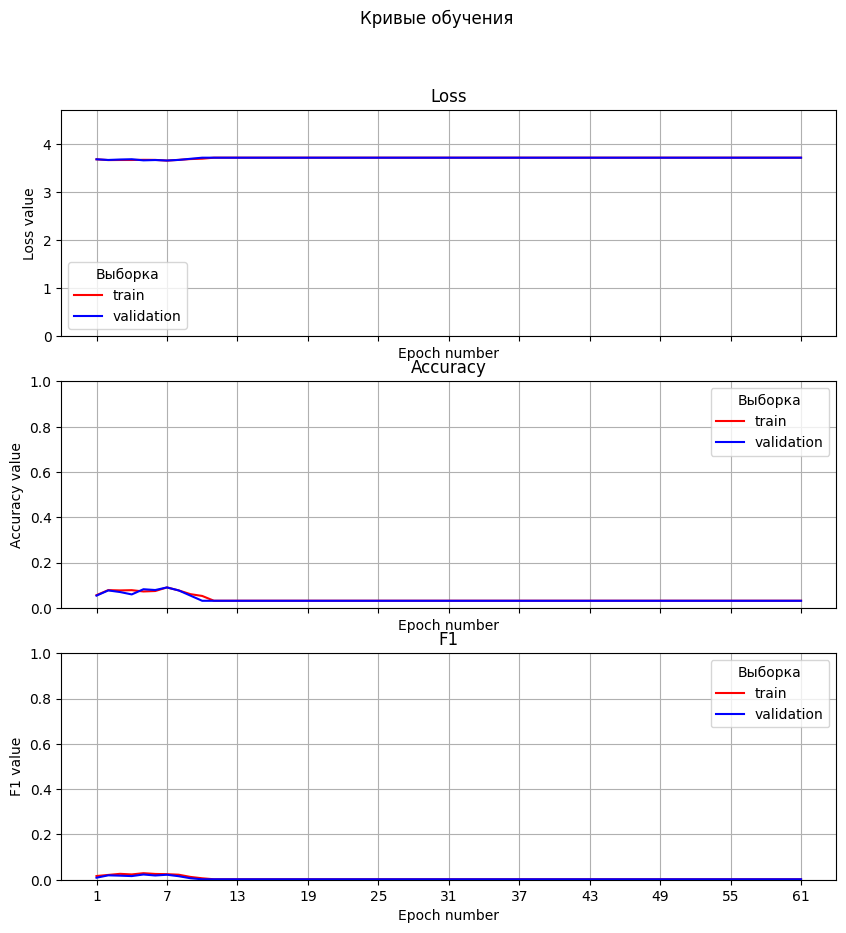

In [41]:
epochs = range(1, n_epoch+1)

fig, (ax_top, ax_bottom, ax_bottom2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

xticks = range(1, n_epoch+1, n_epoch // 10) if n_epoch > 10 else epochs

# draw loss
ax_top.plot(epochs, train_loss, 'r', label='train')
ax_top.plot(epochs, val_loss, 'b', label='validation')

ax_top.set(
    title='Loss',
    xlabel='Epoch number',
    ylabel='Loss value',
    ylim=[0, max(max(train_loss), max(val_loss)) + 1],
)
ax_top.legend(
    title="Выборка",
)
ax_top.grid()

# draw accuracy
ax_bottom.plot(epochs, train_acc, 'r', label='train')
ax_bottom.plot(epochs, val_acc, 'b', label='validation')

ax_bottom.set(
    title='Accuracy',
    xlabel='Epoch number',
    ylabel='Accuracy value',
    xticks=xticks,
    ylim=[0, 1],
)
ax_bottom.legend(
    title="Выборка",
)
ax_bottom.grid()

fig.suptitle("Кривые обучения")

# draw accuracy
ax_bottom2.plot(epochs, train_f1, 'r', label='train')
ax_bottom2.plot(epochs, val_f1, 'b', label='validation')

ax_bottom2.set(
    title='F1',
    xlabel='Epoch number',
    ylabel='F1 value',
    xticks=xticks,
    ylim=[0, 1],
)
ax_bottom2.legend(
    title="Выборка",
)
ax_bottom2.grid()

fig.suptitle("Кривые обучения")

plt.show()

Для каггла

In [42]:
import pandas as pd
df = pd.read_csv(base_folder + 'sample_submission.csv')

In [43]:
arr = df.values
# arr[0, 1] = 2

In [44]:
# f = {}
# for i, row in enumerate(test_data):
#     f[row['fname']] = row['feature']

# x_test = [prepare_shape(f[name]) for name in df['fname']]
    
# test_dset = EventDetectionDataset(x_test, None)

id_to_label = {i: label for i, label in enumerate(label_to_id)}

from torch.utils.data import DataLoader
test_loader = DataLoader(
                        EventDetectionDataset(os.path.join(test_folder), df.fname.values, None),
                        batch_size=41, shuffle=False
                )
# test_loader = DataLoader(test_dset, batch_size=1, shuffle=False, num_workers=num_workers)

In [45]:
outputs = []
outputs_formated = []

with torch.no_grad():
    for i_batch, sample_batched in enumerate(test_loader):
        x = sample_batched

        output = network(x)
        outputs.append(output.argmax(axis=1))
    
    outputs_formated = torch.hstack(outputs).numpy(force=True)



labeled_outputs = [id_to_label[i] for i in outputs_formated]
print(labeled_outputs)
# id_to_label = [label for label, i in label_to_id.items()]

C:\Users\gonch\AppData\Local\Temp\ipykernel_22932\3930228568.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


['Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum', 'Bass_drum'

In [46]:
arr[:, 1] = labeled_outputs

pd.DataFrame(data=arr, columns=['fname', 'label']).to_csv('submission.csv', index=False)